In [1]:
import pandas as pd
import sklearn
import numpy as np
import math
import os

os.getcwd()

'/Users/jackbeck/Documents/phishing-url-project-main'

In [2]:
dataRaw = pd.read_csv('https://raw.githubusercontent.com/jwaldroop/phishing-url-project/main/dataset_full.csv')
dataRaw.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0


In [3]:
dataRaw.shape

(88647, 112)

In [4]:
dataRaw.describe()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
count,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,...,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.00000,88647.000000,88647.000000,88647.000000
mean,2.191343,0.328810,0.113879,1.281781,0.009329,0.205861,0.022133,0.140885,0.002944,0.001015,...,1.136564,2.772412,1.742428,6159.877514,0.506447,0.343903,0.00141,0.002019,0.005482,0.345720
std,1.235636,1.119286,0.657767,1.893929,0.112568,0.954272,0.279652,0.924864,0.087341,0.072653,...,0.895146,1.322999,1.706705,11465.583810,0.499961,0.783892,0.05864,0.063250,0.073841,0.475605
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.00000,-1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,292.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,2029.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,4.000000,2.000000,10798.000000,1.000000,1.000000,0.00000,0.000000,0.000000,1.000000
max,24.000000,35.000000,21.000000,44.000000,9.000000,23.000000,43.000000,26.000000,10.000000,9.000000,...,24.000000,20.000000,20.000000,604800.000000,1.000000,17.000000,1.00000,1.000000,1.000000,1.000000


In [5]:
Features = dataRaw.iloc[:,:-1] # target is in last column
X = Features
y = dataRaw['phishing']
X.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened
0,3,0,0,1,0,0,0,0,0,0,...,-1,1,2,0,892,0,0,0,0,0
1,5,0,1,3,0,3,0,2,0,0,...,150,1,2,1,9540,1,0,0,0,0
2,2,0,0,1,0,0,0,0,0,0,...,-1,1,2,3,589,1,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,-1,1,2,0,292,1,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,306,1,2,1,3597,0,1,0,0,0


In [6]:
# I'll start by plotting correlations for features
import matplotlib.pyplot as plt
import seaborn as sns

#plt.figure(figsize=(50,50))
#sns.heatmap(X.corr())
#plt.show() #it looks like a window lmao; instant regret

#### Preliminary Random Forest Model

In [7]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

# Split into train and test data

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=426)

In [8]:
# making model
model_1 = RandomForestClassifier(n_jobs = -1, verbose = True, n_estimators = 200 , random_state = 426, max_depth = 10)
model_1.fit(train_X,train_y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   11.5s finished


RandomForestClassifier(max_depth=10, n_estimators=200, n_jobs=-1,
                       random_state=426, verbose=True)

In [9]:
# Saving some validation predicitons and probabilites
val_preds = model_1.predict(val_X)
# predict probabilities
probs = model_1.predict_proba(val_X)
# keep probabilities for the positive outcome only
probs_1 = probs[:, 1]


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.6s finished


In [10]:
# Scoring model: Accuracy, F1 Score, Average Precision
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score


print("Mean Accuracy on Test Data:",model_1.score(val_X,val_y))
print("Other Accuracy Which I think is the same:" , accuracy_score(val_y,val_preds))
print("F1 Score:",f1_score(val_y,val_preds))
print("Average Precision:", average_precision_score(val_y, probs_1)) # second input must be y probability estimates of the positive class


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s


Mean Accuracy on Test Data: 0.953117949643534
Other Accuracy Which I think is the same: 0.953117949643534
F1 Score: 0.9332390927199126
Average Precision: 0.9811353940787463


[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.6s finished


In [11]:
# Going to plot the ROC 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# AUC
auc = roc_auc_score(val_y, probs_1)
print('RandomForest: ROC AUC=%.3f' % (auc))

# calculating roc curve
fpr, tpr, thresholds = roc_curve(val_y, probs_1)

RandomForest: ROC AUC=0.990


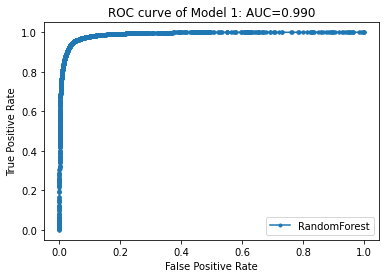

In [15]:
# plotting the curve
plt.plot(fpr, tpr, marker='.', label='RandomForest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# title with AUC
str_ROC_AUC = "{0:.3f}".format(auc)
plt.title('ROC curve of {}: AUC={}'.format("Model 1", str_ROC_AUC))
plt.show()

Text(0.5, 1.0, 'Precision-Recall curve of Model 1: AUC=0.981')

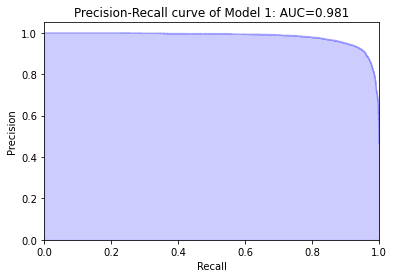

In [13]:
# Precision recall curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_recall_curve

# Calculating values
precision, recall, thresholds = precision_recall_curve(val_y, probs_1)
test_average_precision = average_precision_score(val_y, probs_1)

plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
str_average_precision = "{0:.3f}".format(test_average_precision)
plt.title('Precision-Recall curve of {}: AUC={}'.format("Model 1", str_average_precision))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.4s finished


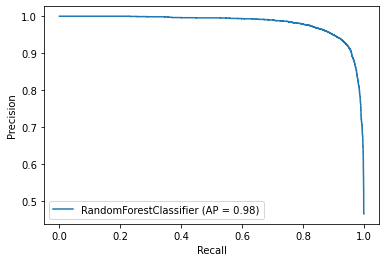

In [14]:
plot_precision_recall_curve(model_1,val_X,val_y)

#### ToDo List:
- check for over and under fitting
- get new data from phishtank, copy the scraping algorithm, and feed the new phishing sites into the current models to see how it works out
- maybe look into cross validation
- is there target leak? Does the model have access to something that is too telling?
- which features are contributing the most to the model?
- https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html